<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/atividade6_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comando da questão

Transforme o exemplo que inicia no slide 55 em código, plotando os histogramas, os cálculos de probabilidades e o resultado da classificação. Organize as probabilidades em tabelas usando Pandas.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations

In [2]:
palavras = pd.read_csv('palavras.csv')
palavras.shape

(4, 3)

In [3]:
palavras.head() # ler csv

,palavra,frequência_em_spam,frequência_em_nao_spam
0,dear,2,8
1,friend,1,5
2,lounch,0,3
3,money,4,1


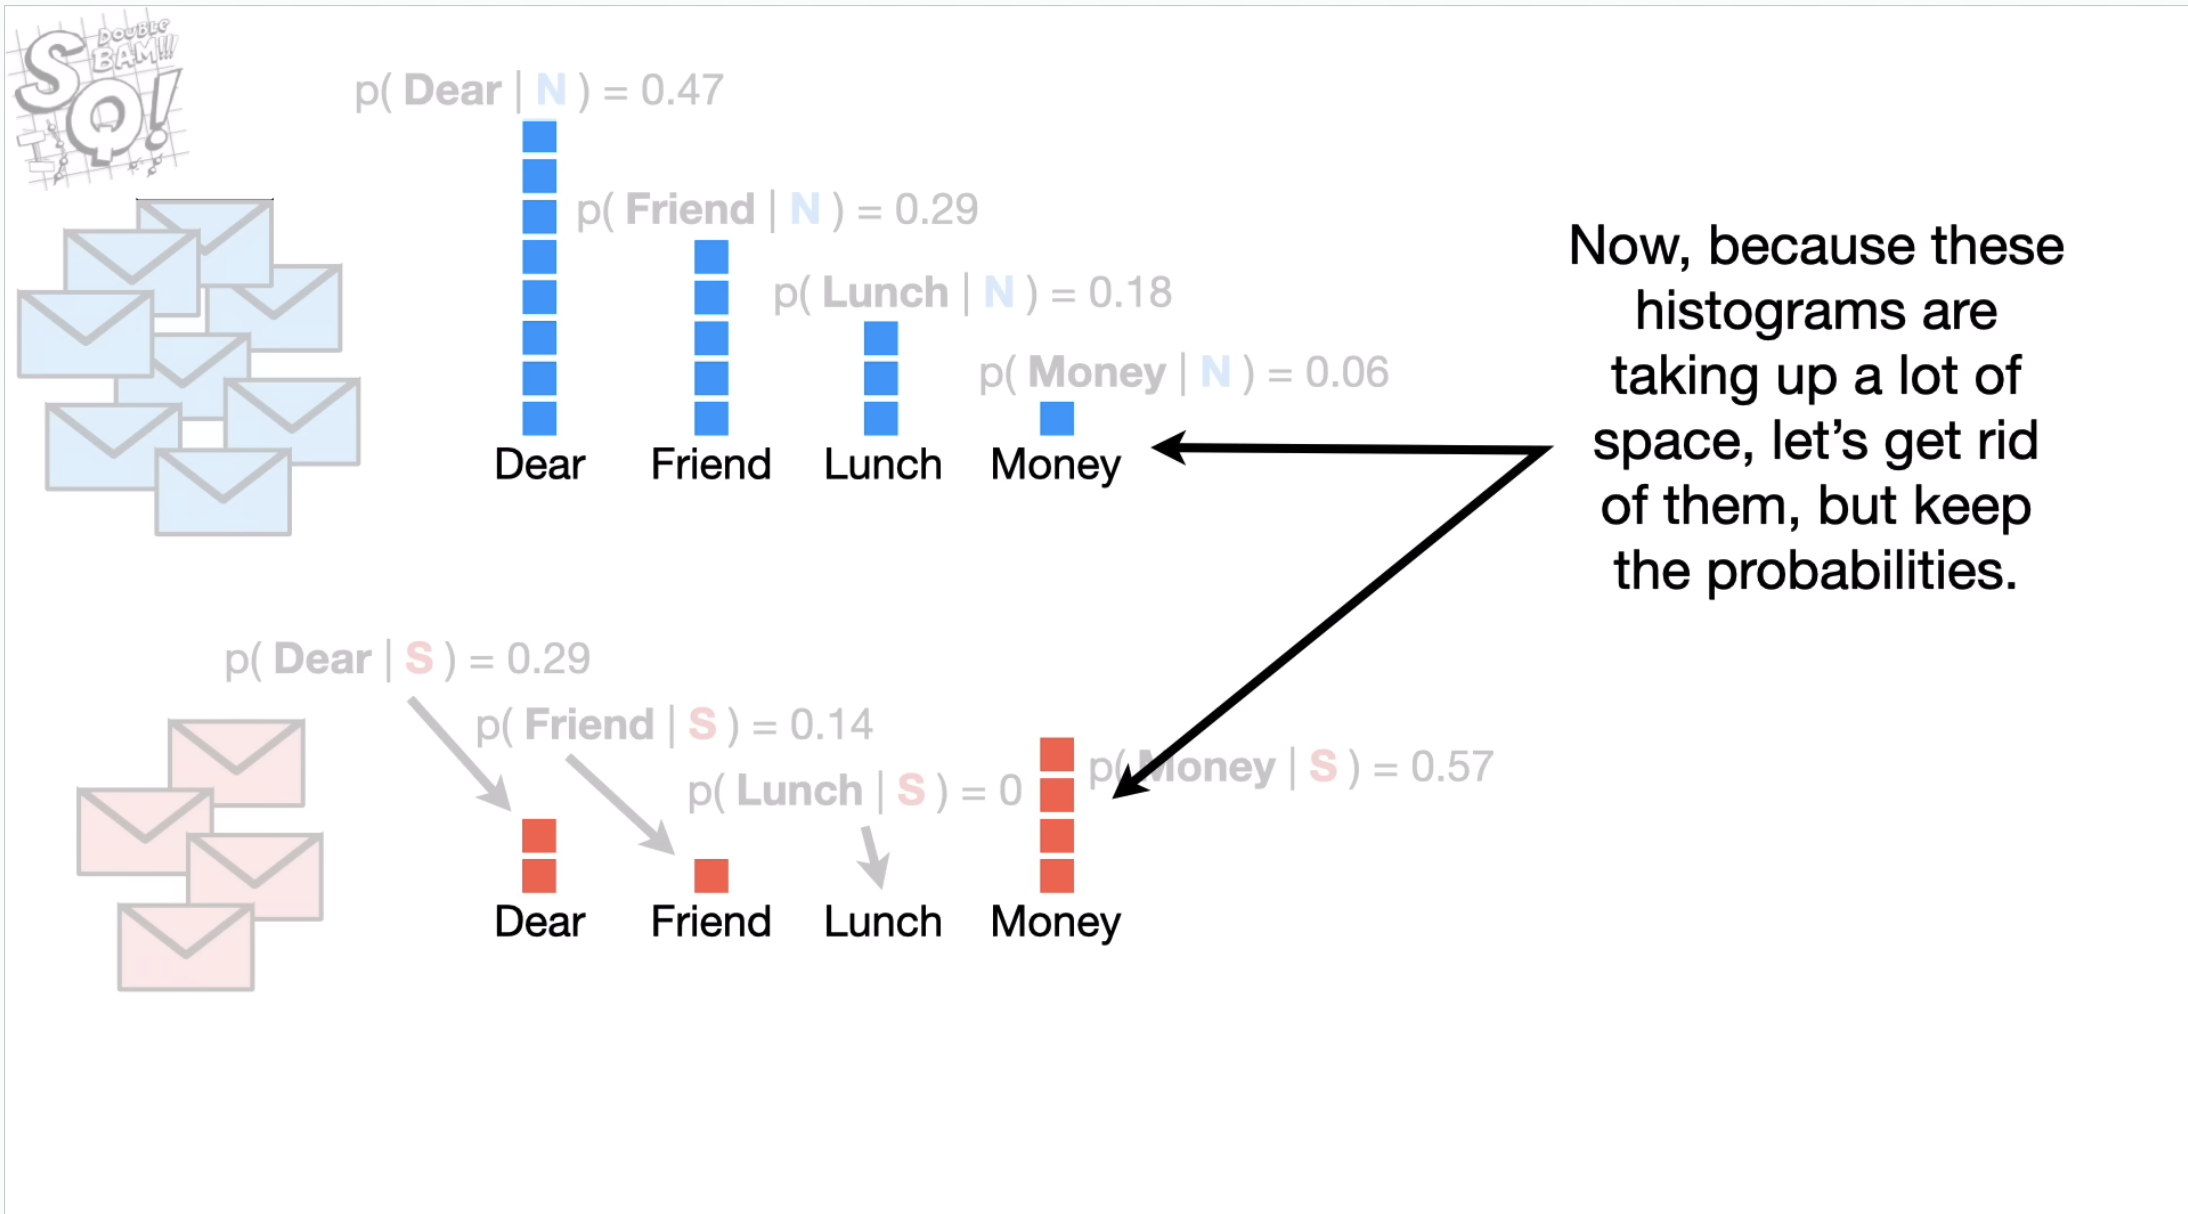

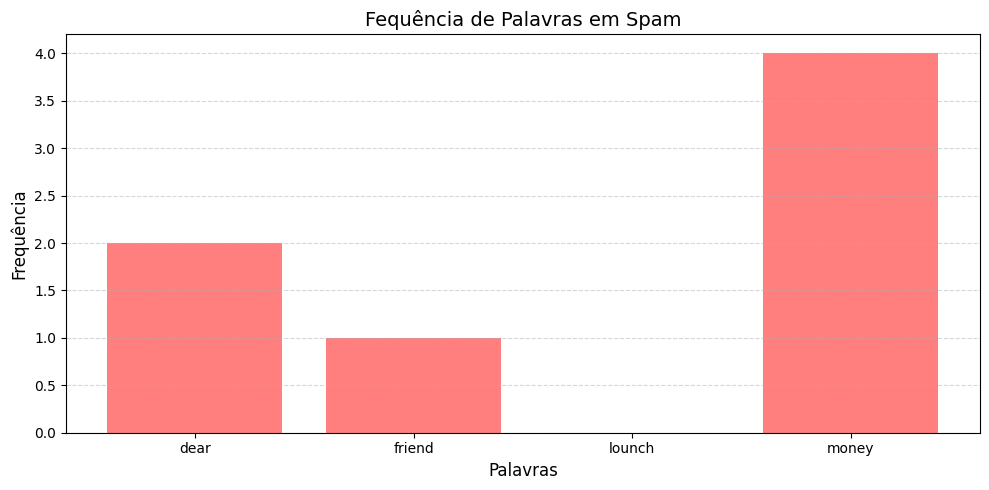

In [4]:
"""
  Plota grafico de barras para frequencia de palavras em spam
"""
plt.figure(figsize=(10, 5))
plt.bar(palavras['palavra'], palavras['frequência_em_spam'], color='red', alpha=0.5)
plt.title('Fequência de Palavras em Spam', fontsize=14)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

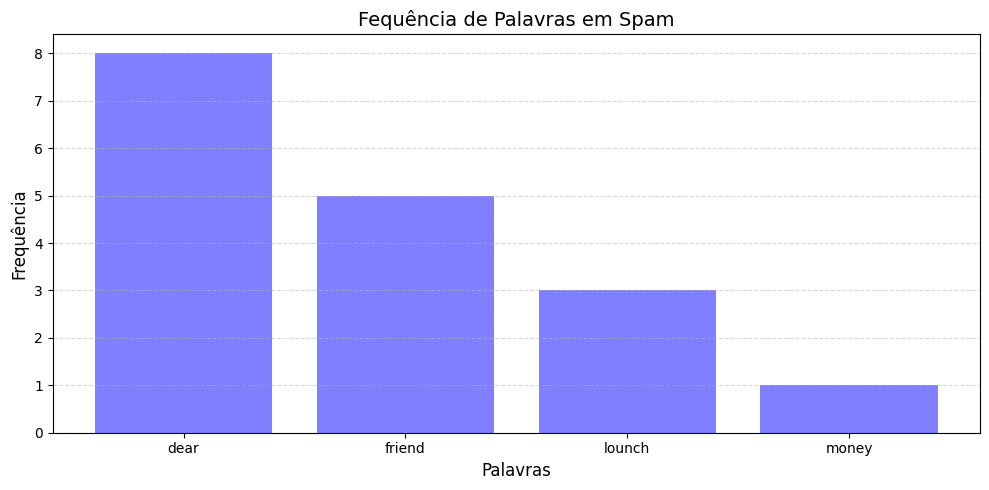

In [5]:
"""
  Plota grafico de barras para frequencia de palavras não spam
"""
plt.figure(figsize=(10, 5))
plt.bar(palavras['palavra'], palavras['frequência_em_nao_spam'], color='blue', alpha=0.5)
plt.title('Fequência de Palavras em Spam', fontsize=14)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# Calcular os totais para spam e não spam
total_spam = palavras['frequência_em_spam'].sum()
print(f'Total spam: {total_spam}')
total_nao_spam = palavras['frequência_em_nao_spam'].sum()
print(f'Total não spam: {total_nao_spam}')

Total spam: 7
Total não spam: 17


Nesse local será feito o calculo da probabilidade de cada palavra para spam e não spam:


$$P(palavra|tipo) = \frac{\text{Frequência da palavra}}{\text{Soma total de todas palavras}}$$


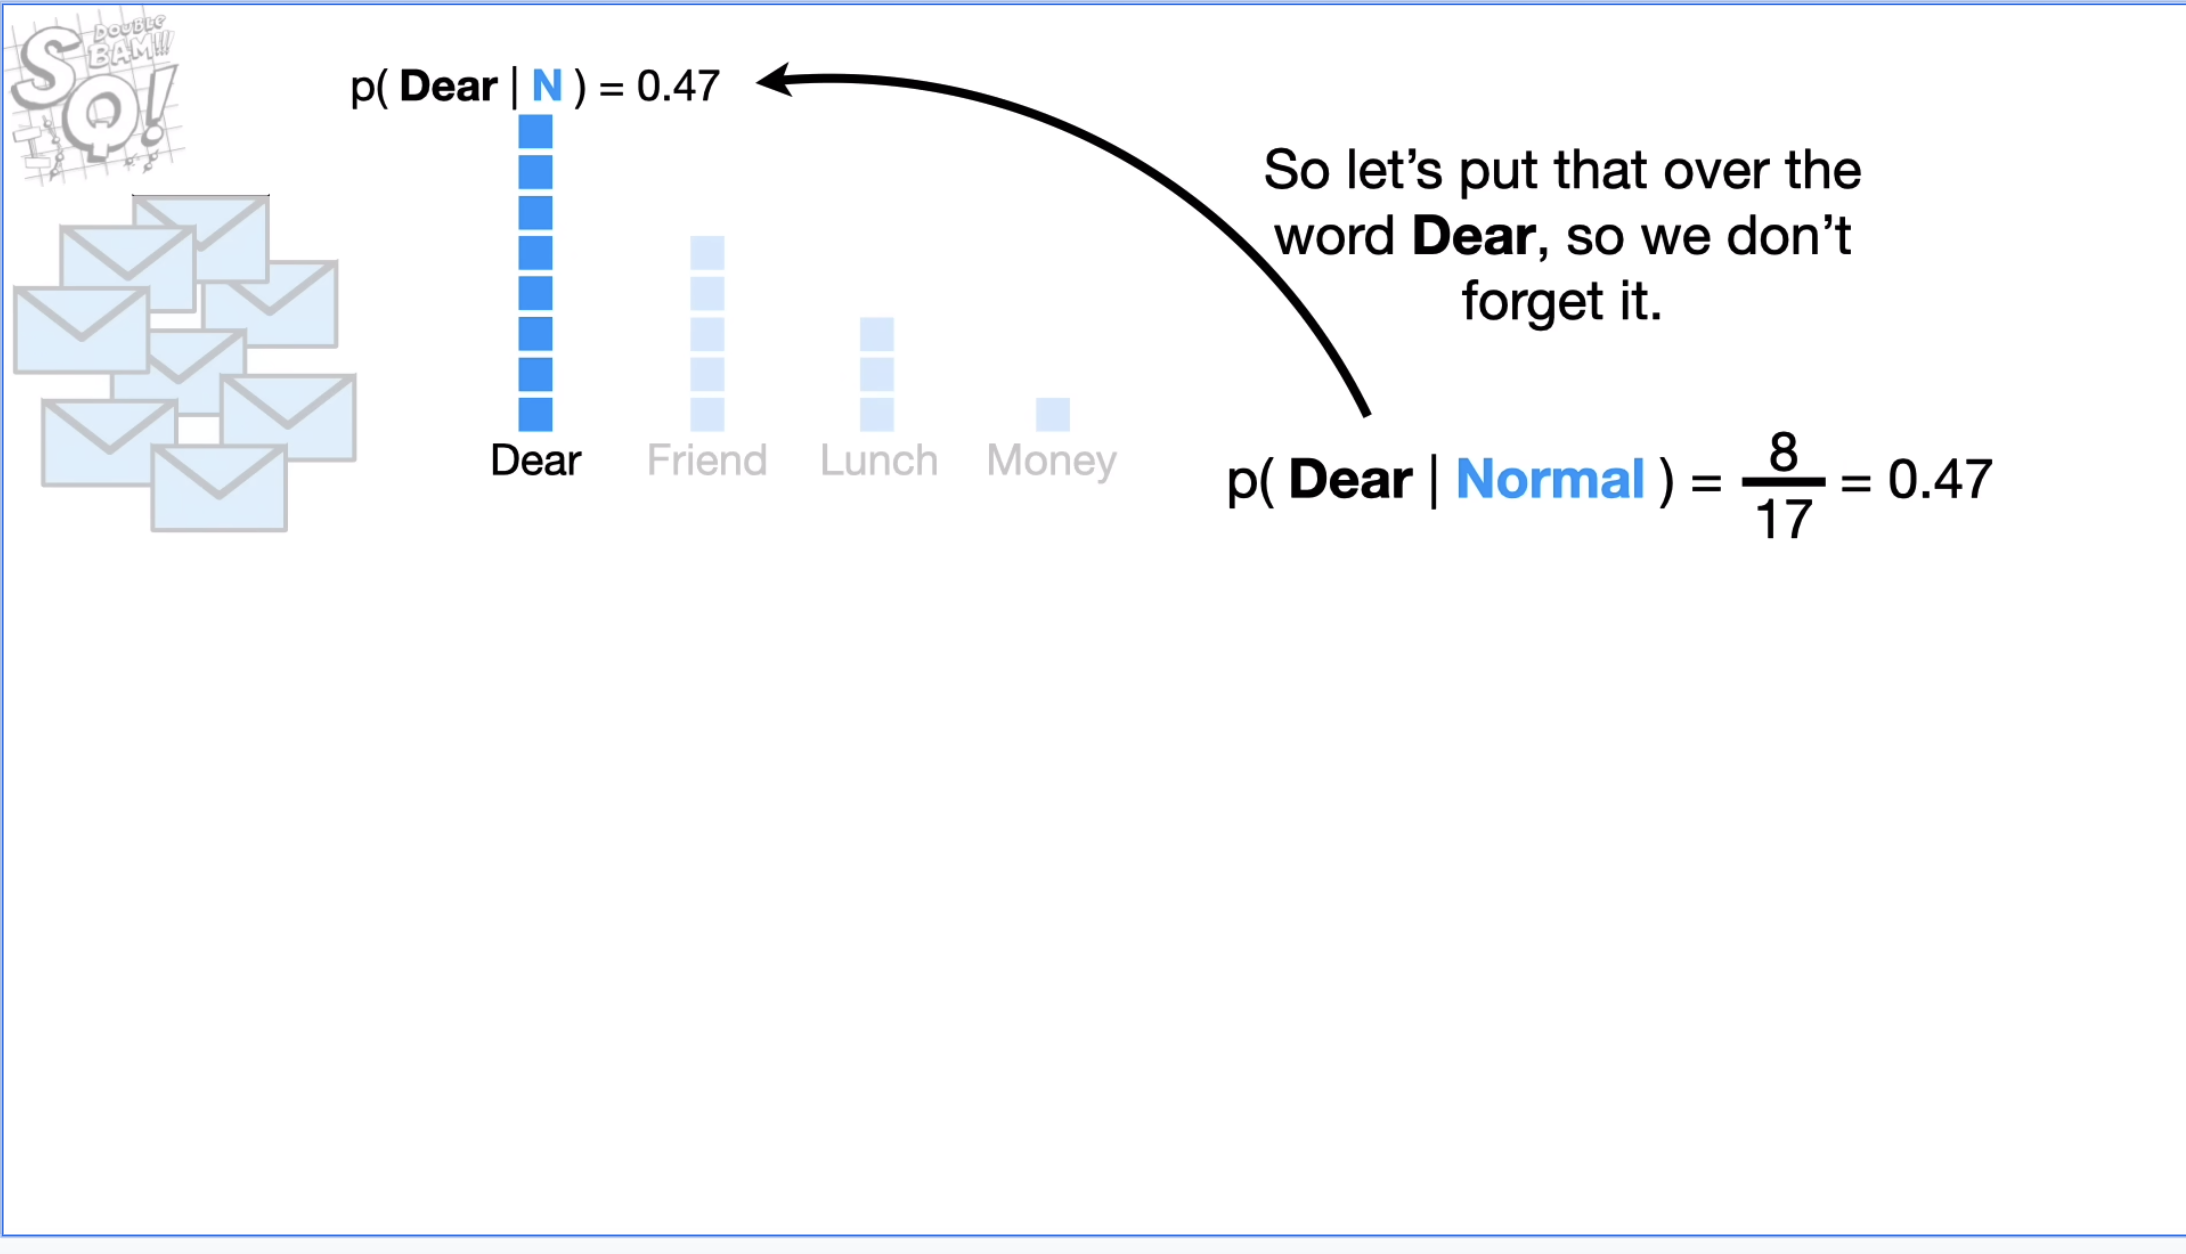

In [7]:
# Adicionar as colunas de frequência relativa
palavras['frequência_relativa_em_nao_spam'] = palavras['frequência_em_nao_spam'] / total_nao_spam
palavras['frequência_relativa_em_spam'] = palavras['frequência_em_spam'] / total_spam

In [8]:
palavras

,palavra,frequência_em_spam,frequência_em_nao_spam,frequência_relativa_em_nao_spam,frequência_relativa_em_spam
0,dear,2,8,0.470588,0.285714
1,friend,1,5,0.294118,0.142857
2,lounch,0,3,0.176471,0.000000
3,money,4,1,0.058824,0.571429


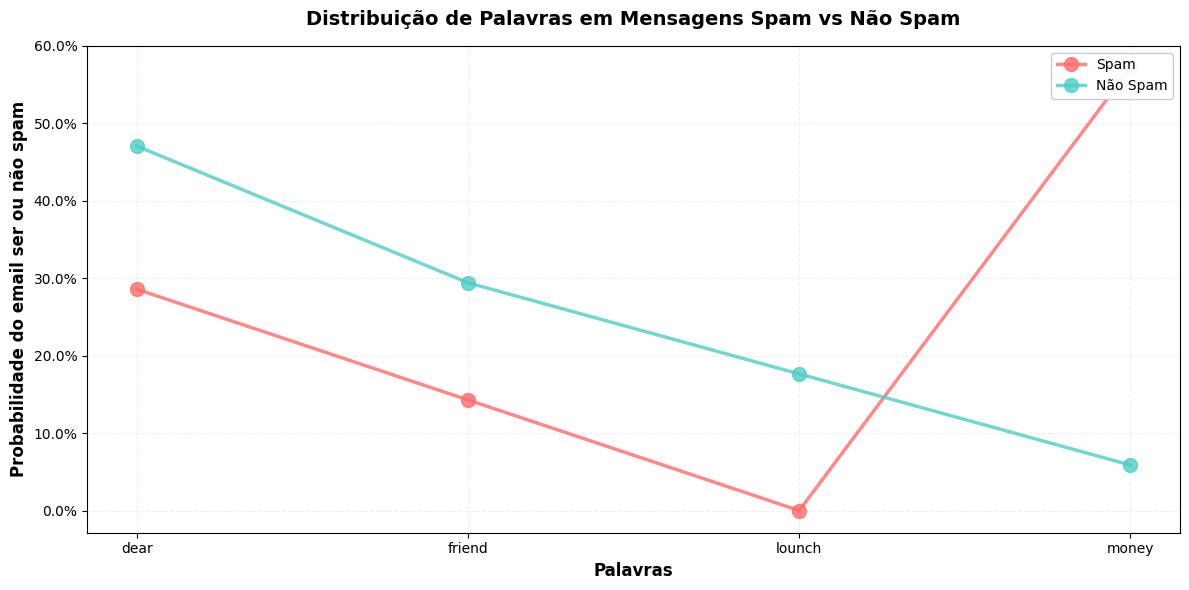

In [9]:
# Criar figura com tamanho adequado
plt.figure(figsize=(12, 6))

# Criar o gráfico de linhas com marcadores
plt.plot(palavras['palavra'], palavras['frequência_relativa_em_spam'],
         'o-', color='#FF6B6B', label='Spam',
         linewidth=2.5, markersize=10, alpha=0.8)
plt.plot(palavras['palavra'], palavras['frequência_relativa_em_nao_spam'],
         'o-', color='#4ECDC4', label='Não Spam',
         linewidth=2.5, markersize=10, alpha=0.8)

# Personalizar o gráfico
plt.xlabel('Palavras', fontsize=12, fontweight='bold')
plt.ylabel('Probabilidade do email ser ou não spam', fontsize=12, fontweight='bold')
plt.title('Distribuição de Palavras em Mensagens Spam vs Não Spam',
          fontsize=14, pad=15, fontweight='bold')

# Grid mais sutil
plt.grid(True, linestyle='--', alpha=0.2)

# Formatar eixo y como percentual
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Legenda com borda e posição ajustada
plt.legend(fontsize=10, framealpha=0.95, loc='upper right')

# Ajustar layout
plt.tight_layout()
plt.show()

Nesse momento precisamos imaginar que recebemos uma nova mensagem que começa com "Dear Friend", então começamos com uma probabilidade inicial (prior probability) p(N), que representa nossa estimativa inicial da probabilidade de qualquer mensagem ser uma mensagem normal (não-spam), independentemente de seu conteúdo.

In [11]:
# pega o maior valor de cada coluna de frequencia
total_spam = palavras['frequência_em_spam'].max()      # 4 mensagens spam (da palavra 'money')
total_nao_spam = palavras['frequência_em_nao_spam'].max()  # 8 mensagens não spam (da palavra 'dear')

In [12]:
# temos: p(n) = frequência_em_nao_spam / frequência_em_nao_spam + requência_em_spam
total_mensagens = total_spam + total_nao_spam
total_mensagens

12

In [13]:
# probabilidade normal final
probabilidade_normal = total_nao_spam / total_mensagens
probabilidade_normal

0.6666666666666666

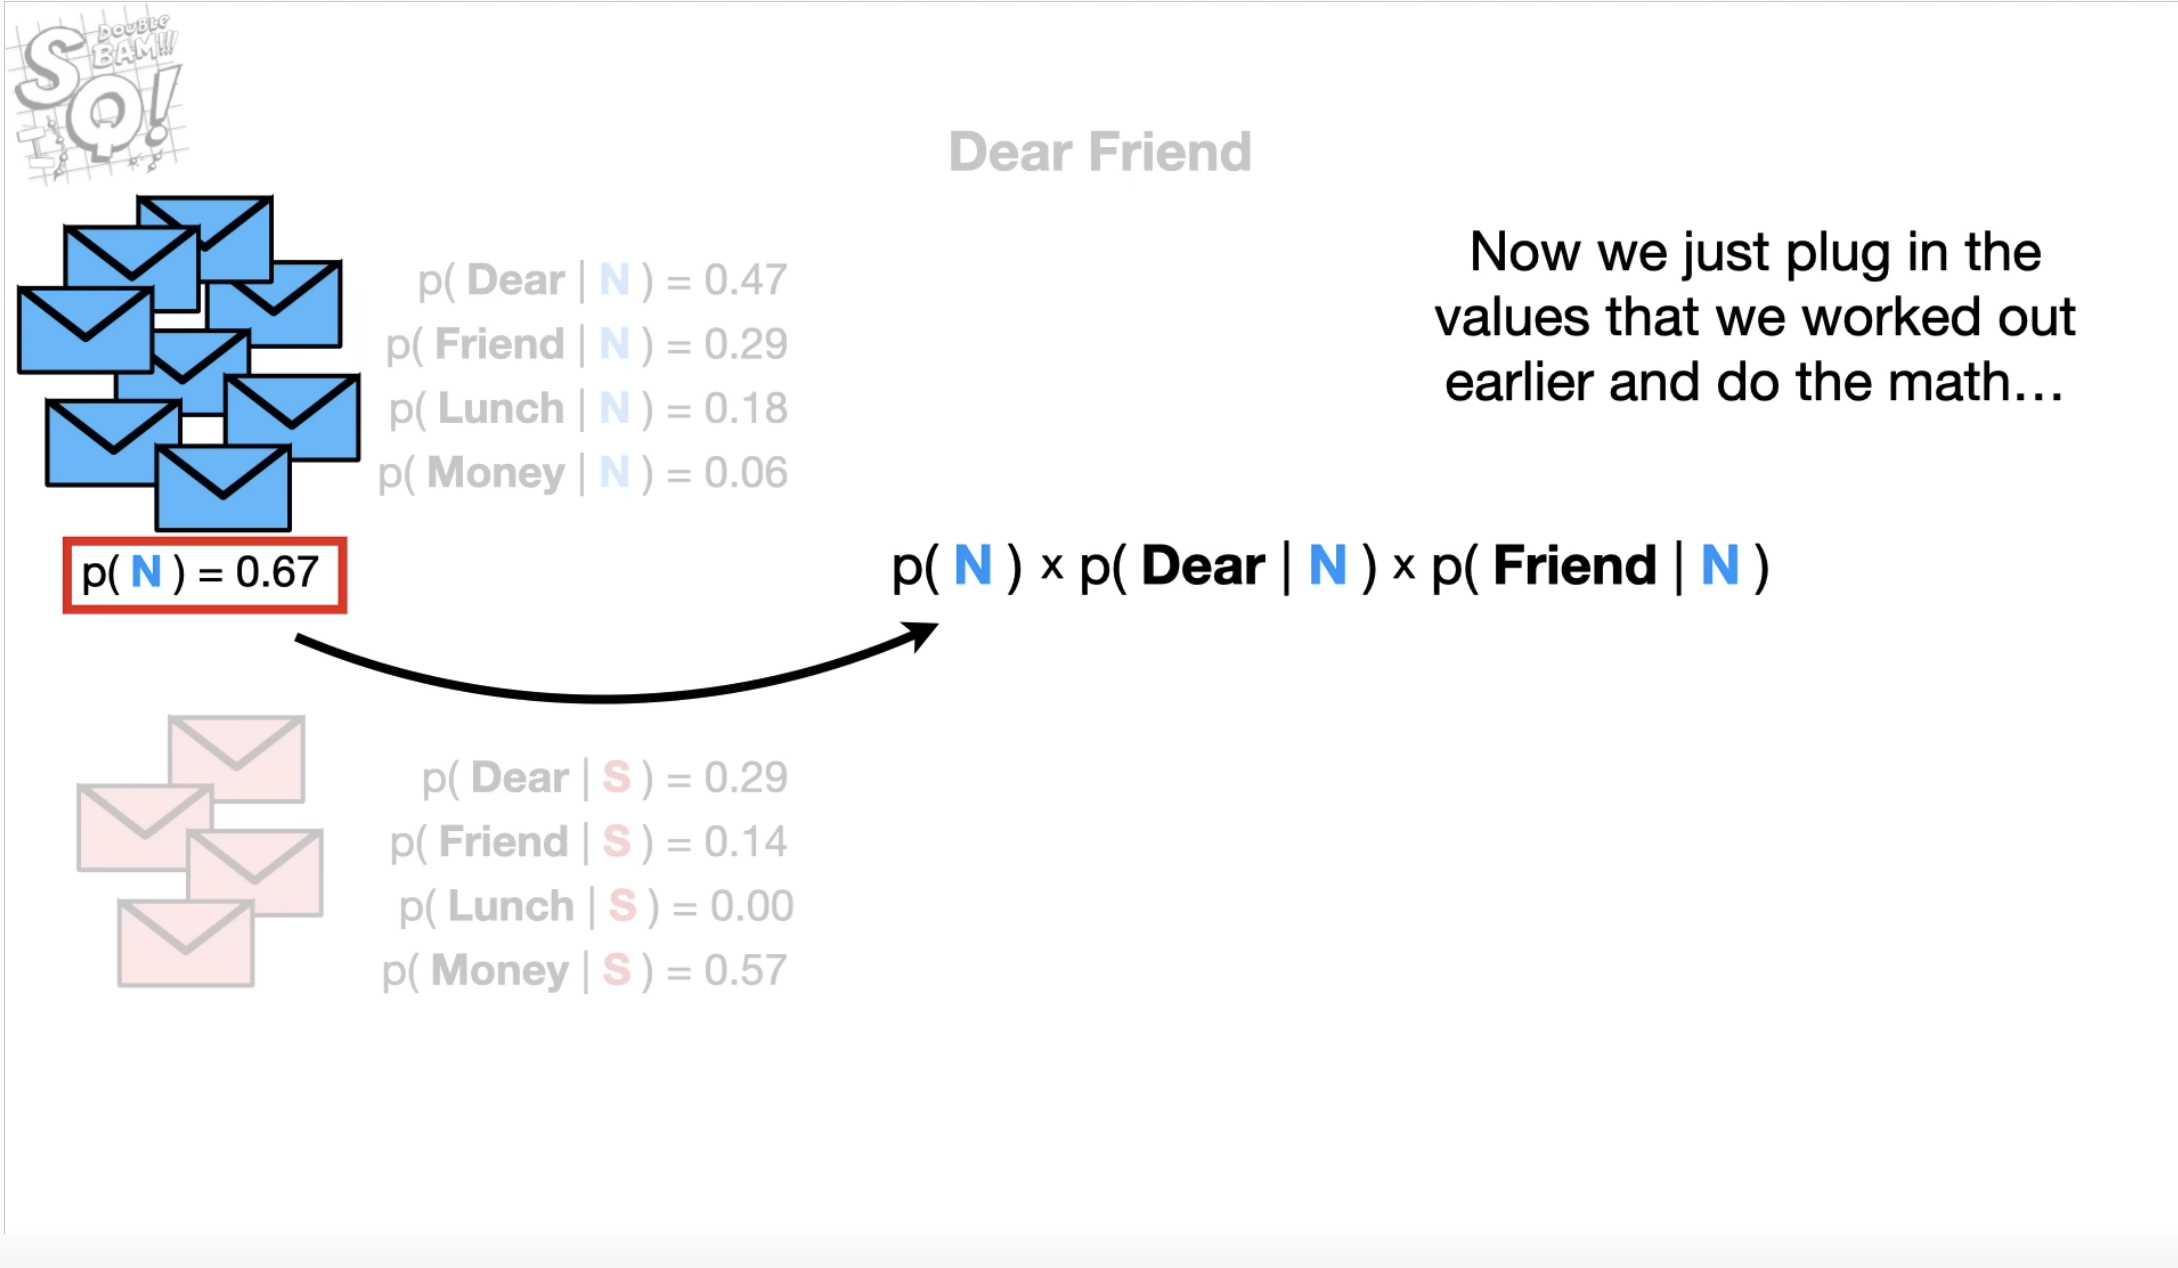

Agora precisamos calcular p(n) X p(Dear | N) X p(friend | N)

In [14]:
# Pegando as probabilidades condicionais do dataset
p_dear_normal = palavras.loc[palavras['palavra'] == 'dear', 'frequência_relativa_em_nao_spam'].iloc[0]
p_friend_normal = palavras.loc[palavras['palavra'] == 'friend', 'frequência_relativa_em_nao_spam'].iloc[0]

In [15]:
# Calculando a probabilidade conjunta para mensagem normal
prob_normal = probabilidade_normal * p_dear_normal * p_friend_normal

In [16]:
print(f"Proporção para p(N|Dear Friend):")
print(f"{probabilidade_normal:.2f} x {p_dear_normal:.2f} x {p_friend_normal:.2f} = {prob_normal:.2f}")
print(f"\nEste valor é proporcional à probabilidade da mensagem ser normal, dado que contém 'Dear Friend'")

Proporção para p(N|Dear Friend):
0.67 x 0.47 x 0.29 = 0.09

Este valor é proporcional à probabilidade da mensagem ser normal, dado que contém 'Dear Friend'


Ou sejam, temos 90% de chances de ser uma mensagem não spam

Faremos o mesmo para mensagens spam

In [17]:
# probabilidade normal final
probabilidade_normal_spam = total_spam/ total_mensagens
probabilidade_normal_spam

0.3333333333333333

In [18]:
# Pegando as probabilidades condicionais do dataset
p_dear_normal = palavras.loc[palavras['palavra'] == 'dear', 'frequência_relativa_em_spam'].iloc[0]
p_friend_normal = palavras.loc[palavras['palavra'] == 'friend', 'frequência_relativa_em_spam'].iloc[0]

In [19]:
# Calculando a probabilidade conjunta para mensagem normal
p_normal = probabilidade_normal_spam * p_dear_normal * p_friend_normal

In [20]:
print(f"Proporção para p(N|Dear Friend):")
print(f"{probabilidade_normal_spam:.2f} x {p_dear_normal:.2f} x {p_friend_normal:.2f} = {p_normal:.2f}")
print(f"\nEste valor é proporcional à probabilidade da mensagem ser normal, dado que contém 'Dear Friend'")

Proporção para p(N|Dear Friend):
0.33 x 0.29 x 0.14 = 0.01

Este valor é proporcional à probabilidade da mensagem ser normal, dado que contém 'Dear Friend'


In [21]:
p_spam = 1 - p_normal

In [22]:
def calcular_proporcoes(combo_palavras, df_palavras):
    """
    Calcula as proporções de spam e não spam para uma combinação de palavras
    """
    # Para mensagem normal
    prob_normal = probabilidade_normal  # usando a probabilidade inicial calculada anteriormente
    for palavra in combo_palavras:
        if palavra.lower() in df_palavras['palavra'].values:
            prob_normal *= df_palavras.loc[df_palavras['palavra'] == palavra.lower(), 'frequência_relativa_em_nao_spam'].iloc[0]

    # Para spam
    prob_spam = probabilidade_normal_spam  # usando a probabilidade inicial de spam calculada anteriormente
    for palavra in combo_palavras:
        if palavra.lower() in df_palavras['palavra'].values:
            prob_spam *= df_palavras.loc[df_palavras['palavra'] == palavra.lower(), 'frequência_relativa_em_spam'].iloc[0]

    return prob_normal, prob_spam

In [23]:
# Testando todas as combinações possíveis de palavras do dataset
palavras_disponiveis = palavras['palavra'].tolist()

In [32]:
todas_combinacoes = []
for r in range(1, 4):
    todas_combinacoes.extend(list(combinations(palavras_disponiveis, r)))

In [33]:
resultados = []

In [34]:
for combo in todas_combinacoes:
    prob_normal, prob_spam = calcular_proporcoes(combo, palavras)
    total = prob_normal + prob_spam
    if total > 0:
        prob_normal_norm = prob_normal / total
        prob_spam_norm = prob_spam / total

        resultados.append({
            'mensagem': ' '.join(combo),
            'normal': prob_normal_norm,
            'spam': prob_spam_norm,
            'prob_normal_bruta': prob_normal,
            'prob_spam_bruta': prob_spam
        })

        print(f"Mensagem: {' '.join(combo)}")
        print(f"Proporção Normal: {prob_normal:.4f}")
        print(f"Proporção Spam: {prob_spam:.4f}")
        print(f"Probabilidade de ser normal: {prob_normal_norm:.1%}")
        print(f"Probabilidade de ser spam: {prob_spam_norm:.1%}")
        print("-" * 50 + "\n")

Mensagem: dear
Proporção Normal: 0.3137
Proporção Spam: 0.0952
Probabilidade de ser normal: 76.7%
Probabilidade de ser spam: 23.3%
--------------------------------------------------

Mensagem: friend
Proporção Normal: 0.1961
Proporção Spam: 0.0476
Probabilidade de ser normal: 80.5%
Probabilidade de ser spam: 19.5%
--------------------------------------------------

Mensagem: lounch
Proporção Normal: 0.1176
Proporção Spam: 0.0000
Probabilidade de ser normal: 100.0%
Probabilidade de ser spam: 0.0%
--------------------------------------------------

Mensagem: money
Proporção Normal: 0.0392
Proporção Spam: 0.1905
Probabilidade de ser normal: 17.1%
Probabilidade de ser spam: 82.9%
--------------------------------------------------

Mensagem: dear friend
Proporção Normal: 0.0923
Proporção Spam: 0.0136
Probabilidade de ser normal: 87.1%
Probabilidade de ser spam: 12.9%
--------------------------------------------------

Mensagem: dear lounch
Proporção Normal: 0.0554
Proporção Spam: 0.0000
Pro

In [35]:
# Criando DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

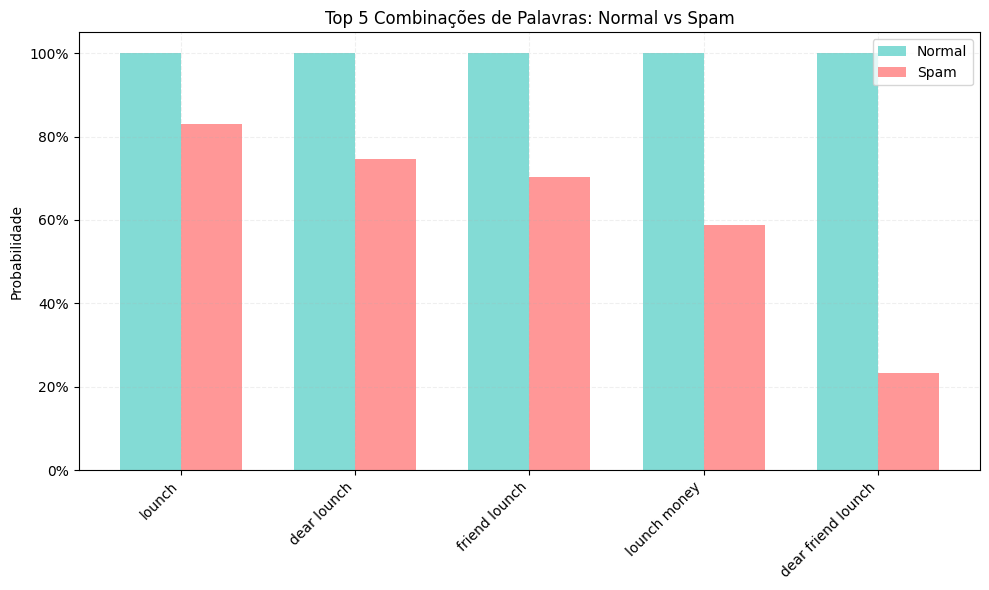

In [36]:
# Configuração de estilo
fig, ax = plt.subplots(figsize=(10, 6))

# Preparar dados
top_normal = resultados_df.nlargest(5, 'normal')
top_spam = resultados_df.nlargest(5, 'spam')

# Criar barras lado a lado
x = np.arange(5)
width = 0.35

normal_bars = ax.bar(x - width/2, top_normal['normal'], width,
                    label='Normal', color='#4ECDC4', alpha=0.7)
spam_bars = ax.bar(x + width/2, top_spam['spam'], width,
                   label='Spam', color='#FF6B6B', alpha=0.7)

# Personalização
ax.set_ylabel('Probabilidade')
ax.set_title('Top 5 Combinações de Palavras: Normal vs Spam')
ax.set_xticks(x)
ax.set_xticklabels(top_normal['mensagem'], rotation=45, ha='right')
ax.legend()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Grid sutil
ax.grid(True, linestyle='--', alpha=0.2)

# Ajustar layout
plt.tight_layout()
plt.show()

Ao final, crie uma função na qual seja dada uma sequência como mostrada abaixo e ela retorne o resultado da classificação.

#lunch money money money money

In [37]:
p_lunch_normal = palavras.loc[palavras['palavra'] == 'lounch', 'frequência_relativa_em_nao_spam'].iloc[0]
p_money_normal = palavras.loc[palavras['palavra'] == 'money', 'frequência_relativa_em_nao_spam'].iloc[0]

In [38]:
probab_normal = p_normal * p_lunch_normal * (p_money_normal ** 4)
probab_normal

2.8746786845867043e-08

In [39]:
print("Cálculo:")
print(f"p(N) x p(Lunch|N) x p(Money|N)^4")
print(f"{p_normal:.2f} x {p_lunch_normal:.2f} x ({p_money_normal:.2f}^4)")
print(f"= {prob_normal:.6f}")

Cálculo:
p(N) x p(Lunch|N) x p(Money|N)^4
0.01 x 0.18 x (0.06^4)
= 0.002035


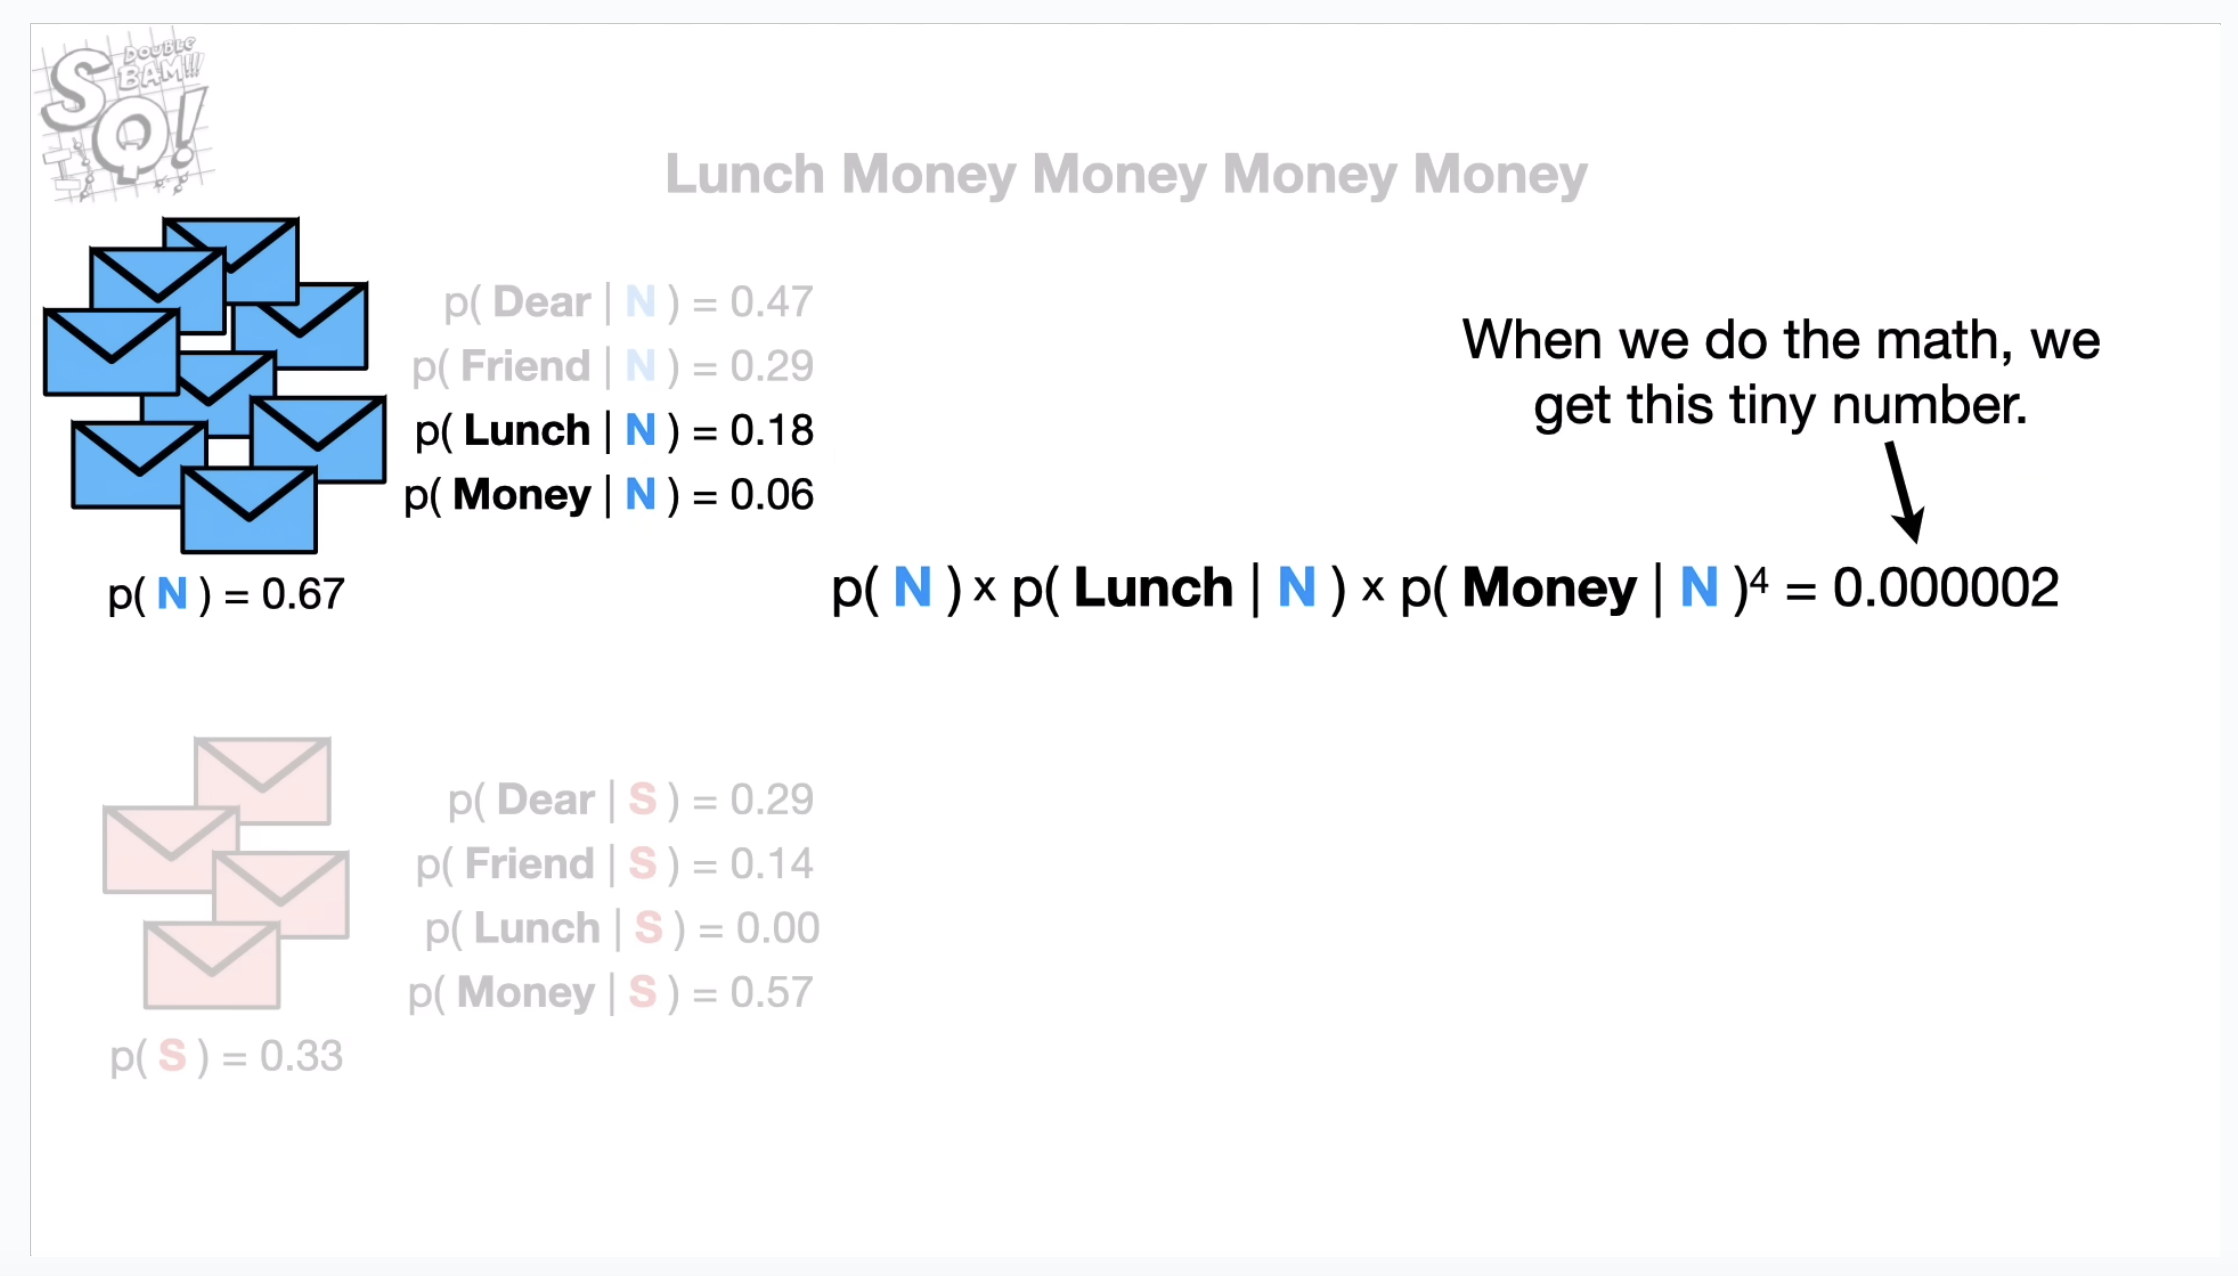